<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Python/210629_Project_2_clinical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')


In [8]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df.describe().round(1)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0
mean,165201645.6,54330400.7,2.0,3.7,5.8,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,102640296.0,38696359.3,1.4,5.3,4.1,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,12522.0,135.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,84961194.0,23413221.0,1.0,1.0,1.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,152388987.0,45505143.0,1.0,1.0,7.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,230270887.5,87545949.8,3.0,4.0,7.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,443867222.0,189502619.0,8.0,28.0,25.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
# renaming diag_ columns to more descriptive ICD9_ name:
df = df.rename(columns={'diag_1':'ICD9_1', 'diag_2':'ICD9_2', 'diag_3':'ICD9_3'})

In [14]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,ICD9_1,ICD9_2,ICD9_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [18]:
# Check if encounter_id is unique
df['encounter_id'].is_unique

True

In [19]:
# Check if patient_nbr is unique
df['patient_nbr'].is_unique

False

In [23]:
# Rank the patients, identified by patient_nbr, in descending order of number of encounters
df.groupby(['patient_nbr'])['encounter_id'].count().sort_values(ascending=False)

patient_nbr
88785891    40
43140906    28
88227540    23
1660293     23
23199021    23
            ..
67638249     1
67636341     1
67633893     1
67633857     1
48164949     1
Name: encounter_id, Length: 71518, dtype: int64

In [26]:
# Rank the primary ICD-9 primary diagnoses codes in order of count
df.groupby(['ICD9_1'])['encounter_id'].count().sort_values(ascending=False).head(20)
# The top 3 ICD-9 diagnosis codes per http://www.icd9data.com/ are:
  # ICD9 code 428 = Heart failure
  # ICD9 code 414 = Other forms of chronic ischemic heart disease
  # ICD9 code 786 = Symptoms involving respiratory system and other chest symptoms


ICD9_1
428      6862
414      6581
786      4016
410      3614
486      3508
427      2766
491      2275
715      2151
682      2042
434      2028
780      2019
996      1967
276      1889
38       1688
250.8    1680
599      1595
584      1520
V57      1207
250.6    1183
518      1115
Name: encounter_id, dtype: int64

In [29]:
# Rank the secondary ICD-9 diagnoses codes in order of count
df.groupby(['ICD9_2'])['encounter_id'].count().sort_values(ascending=False).head(20)

ICD9_2
276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
250.02    2074
707       1999
585       1871
584       1649
491       1545
250.01    1523
285       1520
780       1491
425       1434
682       1433
Name: encounter_id, dtype: int64

In [30]:
# Rank the ICD-9 tertiary diagnoses codes in order of count
df.groupby(['ICD9_3'])['encounter_id'].count().sort_values(ascending=False).head(20)

ICD9_3
250       11555
401        8289
276        5175
428        4577
427        3955
414        3664
496        2605
403        2357
585        1992
272        1969
599        1941
?          1423
V45        1389
250.02     1369
707        1360
780        1334
285        1200
425        1136
250.6      1080
424        1063
Name: encounter_id, dtype: int64

In [69]:
# Rank the count of the number of medications for the top 3 most common primary diagnoses
#df[df['ICD9_1'] == ('428') ]
df.groupby(['ICD9_1'])['num_medications'].count().sort_values(ascending=False)
# Results: The top 3 ICD9_1 codes are showed in rank order, but Python doesn't stop at the the top 3 ICD9_1 codes
# It's as if the filter for ICD91 == 428 has no effect; you need to create a new dataframe for the filter to work: df_icd9_1_top3

ICD9_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
704       1
700       1
698       1
691       1
10        1
Name: num_medications, Length: 717, dtype: int64

In [97]:
df2 = df[(df['ICD9_1'] == '428') or (df['ICD9_1'] == '414') or (df['ICD9_1'] == '786')]
#df2.groupby(['ICD9_1'])['num_medications'].count().sort_values(ascending=False)
df2.head()

ValueError: ignored

In [101]:
# Number of medications given per patient for the most common ICD-9 diagnsosis code, 428:
df2 = df[df['ICD9_1'] == '428']
df2.groupby(['num_medications'])['encounter_id'].count().sort_values(ascending=False)


num_medications
15    498
16    479
13    464
14    461
12    445
17    438
11    402
18    401
19    348
10    348
20    315
9     265
21    226
22    216
8     202
23    182
24    159
7     144
25    144
27    100
26    100
6      90
28     72
29     57
30     41
5      39
32     33
31     29
33     29
34     25
4      25
35     14
37     11
3      11
38     10
36      9
1       5
39      4
40      4
41      3
2       3
44      2
58      1
42      1
45      1
46      1
47      1
49      1
54      1
56      1
67      1
Name: encounter_id, dtype: int64

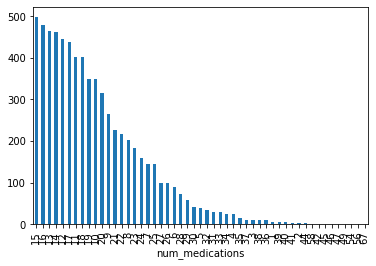

In [106]:
# Plot of number of medications given per patient for the most common ICD-9 diagnsosis code, 428:
df2 = df[df['ICD9_1'] == '428']
df2.groupby(['num_medications'])['encounter_id'].count().sort_values(ascending=False).plot(kind="bar")

In [102]:
# Number of medications given per patient for the 2nd most common ICD-9 diagnsosis code, 414:
df2 = df[df['ICD9_1'] == '414']
df2.groupby(['num_medications'])['encounter_id'].count().sort_values(ascending=False)


num_medications
12    389
13    371
15    358
16    344
14    338
     ... 
69      2
70      2
72      2
75      1
81      1
Name: encounter_id, Length: 73, dtype: int64

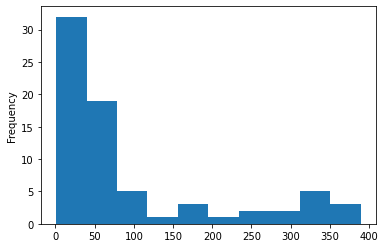

In [107]:
# Plot of the number of medications given per patient for the 2nd most common ICD-9 diagnsosis code, 414:
df2 = df[df['ICD9_1'] == '414']
df2.groupby(['num_medications'])['encounter_id'].count().sort_values(ascending=False).plot(kind="hist")

In [103]:
# Number of medications given per patient for the 3rd most common ICD-9 diagnsosis code, 786:
df2 = df[df['ICD9_1'] == '786']
df2.groupby(['num_medications'])['encounter_id'].count().sort_values(ascending=False)

num_medications
9     306
8     297
10    295
11    293
13    276
12    270
7     230
15    230
14    223
16    206
6     190
17    161
5     159
18    124
4     103
19     95
20     82
21     71
3      70
22     56
23     49
24     42
2      31
1      30
25     27
27     23
26     12
28     12
30     11
29     10
31      8
32      7
33      6
34      2
42      1
52      1
51      1
43      1
57      1
39      1
37      1
35      1
59      1
Name: encounter_id, dtype: int64

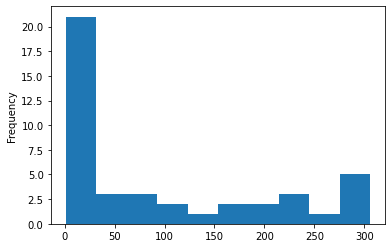

In [113]:
# Plot of Number of medications given per patient for the 3rd most common ICD-9 diagnsosis code, 786:
df2 = df[df['ICD9_1'] == '786']
df2.groupby(['num_medications'])['encounter_id'].count().sort_values(ascending=False).plot(kind = "hist")  


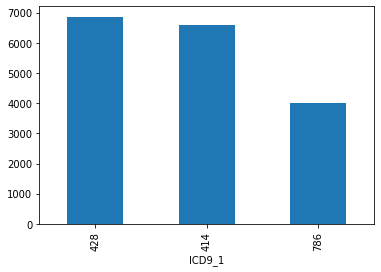

In [60]:
# Rank the count of the number of medications for the top 3 most common primary diagnoses
df[df['ICD9_1'] == ('428' or '414' or '786') ]
df.groupby(['ICD9_1'])['num_medications'].count().sort_values(ascending=False).head(3).plot(kind = "bar")


In [65]:
# Rank the count of the number of lab procedures for the top 3 most common primary diagnoses
df[df['ICD9_1'] == ('428' or '414' or '786') ]
df.groupby(['ICD9_1'])['encounter_id'].count().sort_values(ascending=False)
# Problem: the results for the number of lab procedures are the same as for the number of medications 

ICD9_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
704       1
700       1
698       1
691       1
10        1
Name: encounter_id, Length: 717, dtype: int64

In [4]:
# Age distribution for the most common ICD-9 diagnsosis code, 428:
df2 = df[df['ICD9_1'] == '428']
df2.groupby(['age'])['encounter_id'].count().sort_values(ascending=False)

age
[70-80)     2135
[80-90)     1639
[60-70)     1536
[50-60)      871
[90-100)     309
[40-50)      297
[30-40)       62
[20-30)       12
[10-20)        1
Name: encounter_id, dtype: int64

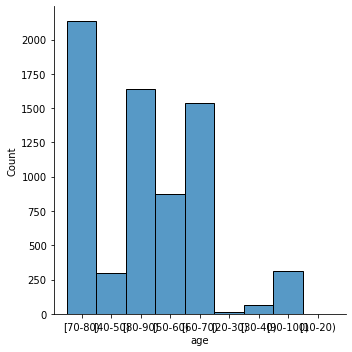

In [19]:
# Plot of Age distribution for the most common ICD-9 diagnsosis code, 428:
df2 = df[df['ICD9_1'] == '428']
df2.groupby(['age'])['encounter_id'].count().sort_values(ascending=False)
sns.displot(df2['age'],bins=80).figsize=(80,4)
# The bins=50 and figsize=(80,4) have no effect 

In [13]:
sns.jointplot(x=count(), y='age', data=df2)

NameError: ignored

In [17]:
sns.pairplot(df2['age'], dfs['gender'])

NameError: ignored

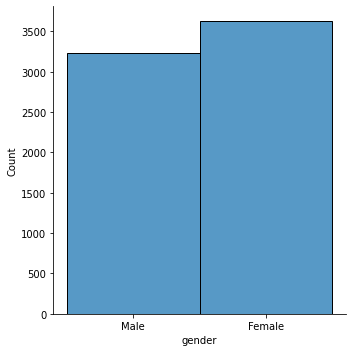

In [20]:
# Plot of Gender distribution for the most common ICD-9 diagnsosis code, 428:
df2 = df[df['ICD9_1'] == '428']
df2.groupby(['gender'])['encounter_id'].count().sort_values(ascending=False)
sns.displot(df2['gender'],bins=80).figsize=(80,4)


In [22]:
# Plot of Gender distribution for the most common ICD-9 diagnsosis code, 428:
df2 = df[(df['ICD9_1'] == '428') or (df['ICD9_1'] == '414')]
df2.groupby(['gender'])['encounter_id'].count().sort_values(ascending=False)
sns.displot(df2['gender'])
# The OR operator doesn't work. The & operator works but generates no results. 

ValueError: ignored

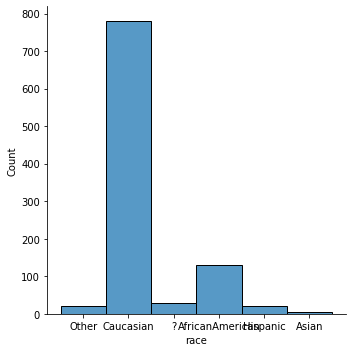

In [53]:
# Plot of Race distribution for patients with the 2nd most common ICD-9 diagnsosis code, 414, and taking glipizide:
df2 = df[(df['ICD9_1'] == '414') & (df['glipizide']!= 'No') ]
df2.groupby(['race'])['encounter_id'].count().sort_values(ascending=False)
sns.displot(df2['race'])

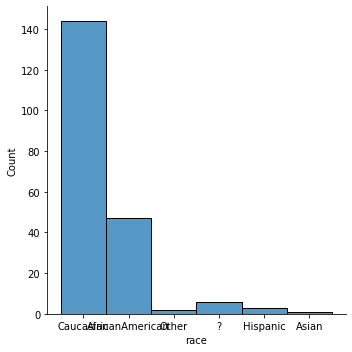

In [35]:
# Plot of Race distribution for women aged 40-50 with the 2nd most common ICD-9 diagnsosis code, 414:
df2 = df[(df['ICD9_1'] == '414') & (df['gender']=='Female') & (df['age']=='[40-50)')]
df2.groupby(['race'])['encounter_id'].count().sort_values(ascending=False)
sns.displot(df2['race'])

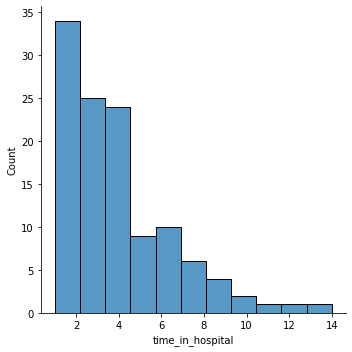

In [36]:
# Plot of days in hospital distribution for Hispanics with the third most common ICD-9 diagnsosis code, 786:
df2 = df[(df['ICD9_1'] == '428') & (df['race']=='Hispanic')]
df2.groupby(['time_in_hospital'])['encounter_id'].count().sort_values(ascending=False)
sns.displot(df2['time_in_hospital'])

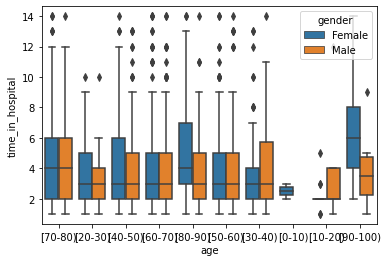

In [46]:
# Plot of days in hospital by age for Hispanics, with gender differention by hue
df2 = df[df['race']=='Hispanic']
df2.groupby(['age'])['encounter_id'].count().sort_values(ascending=False)
sns.boxplot(x='age', y='time_in_hospital', data = df2, hue='gender')